# Lab2: Linear regression using robust functions

**Carla Sendra Balcells**\
**Roxane Le Tensorer**\
**Rachel Trimble**

## Gradient Descent

### 1. Without Outliers

In [3]:
import numpy as np
import math
from matplotlib import pyplot as plt

We first create the ramdomly generated set of points. The generated points are in an array c containing 100 points in two dimensions. For the moment, all of them are coherent and should give a coherent result.

In [4]:
m = [0.,0.]
angle = 45*math.pi/180
rot = np.array([[math.cos(angle), -math.sin(angle)], [math.sin(angle),
math.cos(angle)]])
lamb = np.array([[100,0],[0,1]])
s = np.matmul(rot, np.matmul(lamb, rot.transpose()))
c = np.random.multivariate_normal(m,s,100)

In [5]:
c.shape

(100, 2)

We plot the 100 points on a graph.

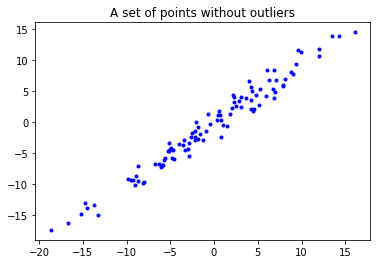

In [6]:
plt.plot(c[:,0], c[:,1], 'b.')
plt.title("A set of points without outliers")
plt.show()

We create the appropriate functions. <br>
y_hat corresponds to the fitting line <br>
Q corresponds to the least square errors function. This is the function we want to minimize. <br>
gradQ corresponds to the Q gradient, so it is calculated by deriving the Q function.

In [7]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(w, x, y):
    return (y_hat(w,x)-y)**2

def Q(w, x, y):
    return (1/2)*sum([lse(w, xi, yi) for xi, yi in zip(x, y)])

In [8]:
def gradQ(w, x, y):
    dQw0 = sum([(w[0]*xi + w[1] - yi)*xi for xi, yi in zip(x, y)])
    dQw1 = sum([(w[0]*xi + w[1] - yi) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

We create now the gradient descent function. We decide to use a random starting w value.<br>
We use a backtracking for alpha. As stop conditions, we pay attention to : 
1. The difference between the least square errors function of the previous w value, and the least square errors function of the current w value. When this difference is low enough (under 10e-4), it means that the minimum is reached.
2. The value of the Q gradient. When this value is really low (under 10e-5), it means that the minimum is reached.

In [11]:
def grad_desc(x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(w0, x, y)
        
        while(Q(w, x, y) > Q(w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(w, x, y)
            
        #print(it, Q(w, x, y))
        
        if(np.abs(Q(w, x, y) - Q(w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(w, x, y)) < 10e-5):
            print("Number of iterations: "+str(it))
            print("Values of w: "+str(w[0])+", "+str(w[1]))
            break
        w0 = w 
        
    return w0

Number of iterations: 47544
Values of w: 0.9299802070743767, 0.32079622433469324


Text(0.5, 1.0, 'Regression without outliers')

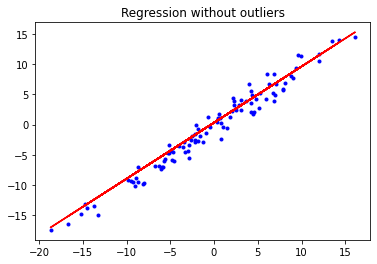

In [14]:
alpha = 1
max_iters = 100000

x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

We can see in this result that the line corresponds to the set of data points. We can even check what the coefficients of this line are, and it corresponds to the 45° angle we used for the random generation of the points. Indeed, an 45° slope means that the leading coefficient is equal to 1. Here, the leading coefficient is w[0] and his value is really close to 1. <br>
We can also notice that this algorithm is pretty long, because it requires approximatively 40000 iterations. <br>

### 2. With Outliers

Now, we try to use the same algorithm but with a non-coherent point. This point will be called c_out, with a value (-40, 20). This point doesn't correspond at all to the other ones, and we will analyse how well the algorithm deal with this value.

Number of iterations: 37345
Values of w: 0.5720498676988485, -0.5219225430744362


Text(0.5, 1.0, 'Regression without outliers')

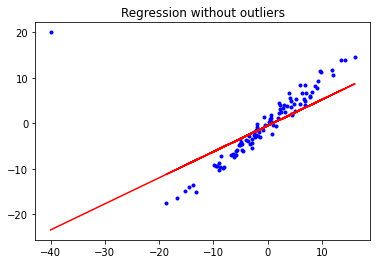

In [15]:
c_out = c.copy()
c_out[0]=[-40, 20]

x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Regression without outliers")

We can see now that the linear regression doesn't work well anymore. This leading coefficient is now far from 1, and we even visually see that the line doesn't correspond to the set of points. <br>
This is logical because, when the Q gradient is calculated, the outliers value is take into account in the errors sum. This value is very far from the other ones, which means that the square error will be important and then have a big impact in this calculus.<br>
This is the reason why, in order to minimize the vertical distance with all of the points, the line has to be much "horizontal" than it is supposed to be.

## Cauchy

In order to avoid the problem of outliers points, we will now modify our algorithm with the Cauchy function.

## 1.

In [259]:
u=np.linspace(0,10,100)

In [260]:
def leastsquares(u):
    x=u
    y=.5*u**2
    return x,y

def cauchy(u):
    x=u
    y=.5*np.log(1+u**2)
    return x,y

Text(0.5, 1.0, 'Cauchy')

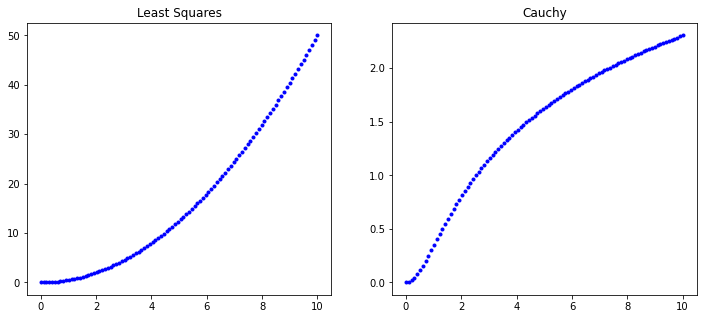

In [261]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (12, 5))
ax1.plot(leastsquares(u)[0], leastsquares(u)[1], 'b.')
ax1.set_title("Least Squares")

ax2.plot(cauchy(u)[0], cauchy(u)[1], 'b.')
ax2.set_title("Cauchy")

## 2.

In [262]:
def y_hat(w, x):
    return w[0]*x+w[1]

def lse(c, w, x, y):
    return np.log(1+((y_hat(w,x)-y)/c)**2)

def Q(c, w, x, y):
    return ((c**2)/2)*sum([lse(c, w, xi, yi) for xi, yi in zip(x, y)])

In [263]:
def gradQ(c, w, x, y):
    dQw0 = (c**2)*sum([(xi*(w[0]*xi + w[1] - yi))/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    dQw1 = (c**2)*sum([(w[0]*xi + w[1] - yi)/((w[0]*xi + w[1] - yi)**2+(c**2)) for xi, yi in zip(x, y)])
    return np.array([dQw0, dQw1])

In [264]:
def grad_desc(c, x, y, alpha, max_iters):
    w0 = np.random.randn(2)
    
    for it in range(max_iters):

        # alpha-backtracking
        w = w0 - alpha*gradQ(c, w0, x, y)
        
        while(Q(c, w, x, y) > Q(c, w0, x, y)):
            alpha = alpha/2
            w = w0 - alpha*gradQ(c, w, x, y)
        
        if(np.abs(Q(c, w, x, y) - Q(c, w0, x, y)) < 10e-4) | (np.linalg.norm(gradQ(c, w, x, y)) < 10e-5):
            break
        w0 = w 
        
    return w0

## 3.

Text(0.5, 1.0, 'Cauchy without outliers')

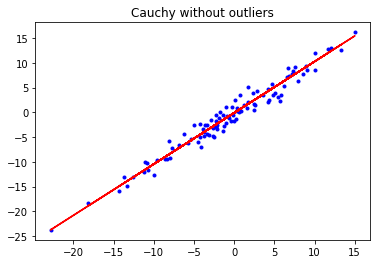

In [265]:
alpha = 1
max_iters = 100000
c1=1
x, y = c[:, 0], c[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy without outliers")

## 4.

Text(0.5, 1.0, 'Cauchy with outliers')

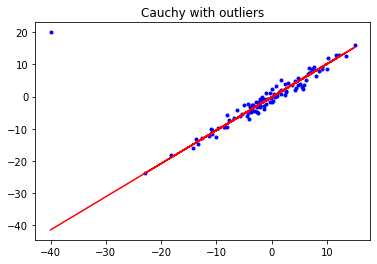

In [266]:
x, y = c_out[:, 0], c_out[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers")

## 5.

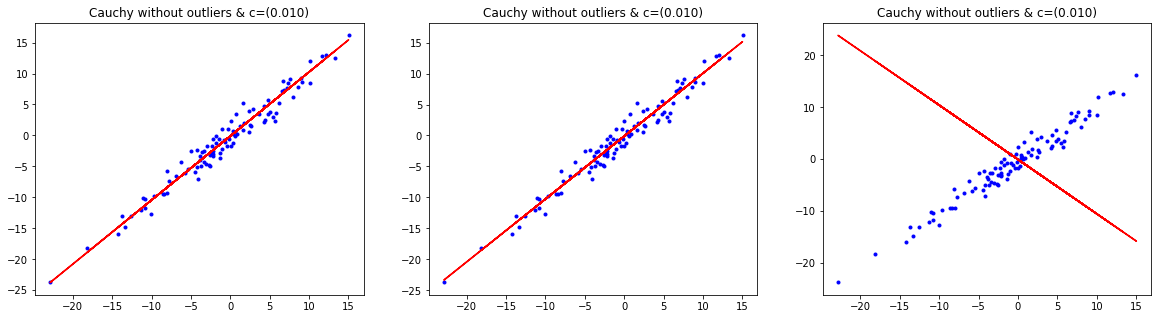

In [267]:
c1=np.array([1,100,1/100])

fig = plt.figure(figsize=(20,5))

num_plots = 3
base = 100 + num_plots * 10

for i in range(num_plots):
    c1_new=c1[i]
    ax = fig.add_subplot(base+(1+i))
    x, y = c[:, 0], c[:, 1]
    ax.plot(x, y, 'b.')
    w = grad_desc(c1_new, x, y, alpha, max_iters)
    ax.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
    ax.set_title("Cauchy without outliers & c=(%.3f)" % d)


## 6.

Text(0.5, 1.0, 'Cauchy with outliers 5 outliers')

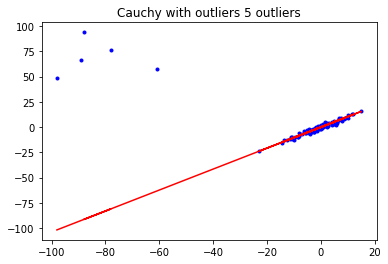

In [268]:
c1=1
c_out_5 = c.copy()
x = np.random.randint(-100, -60, 5)
y = np.random.randint(40, 100,5)
c_new=np.column_stack((x, y))
c_out_5[:5]=c_new

x, y = c_out_5[:, 0], c_out_5[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers 5 outliers")

Text(0.5, 1.0, 'Cauchy with outliers 15 outliers')

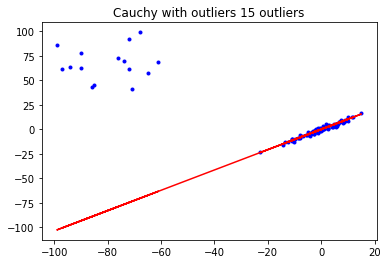

In [269]:
c_out_15 = c.copy()
x = np.random.randint(-100, -60, 15)
y = np.random.randint(40, 100,15)
c_new=np.column_stack((x, y))
c_out_15[:15]=c_new

x, y = c_out_15[:, 0], c_out_15[:, 1]
plt.plot(x, y, 'b.')
w = grad_desc(c1, x, y, alpha, max_iters)
plt.plot(x, [w[0]*xi + w[1] for xi in x], 'r')
plt.title("Cauchy with outliers 15 outliers")